# Millas por galón
Se está haciendo una investigación en la industria automotriz para mejorar el rendimiento de los motores a combustible. Para esto, se recolectó un set de datos que contiene el rendimiento (millas por galón) de distintos modelos de automóviles, así como también de los factores que se piensa influyan.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as metrics
import seaborn as sns

In [5]:
df = pd.read_csv('millas-por-galon.csv')

In [6]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg,car name
0,discrete,continuous,continuous,continuous,continuous,discrete,discrete,continuous,string
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,8,307.0,130.0,3504.0,12.0,70,1,18.0,chevrolet chevelle malibu
3,8,350.0,165.0,3693.0,11.5,70,1,15.0,buick skylark 320
4,8,318.0,150.0,3436.0,11.0,70,1,18.0,plymouth satellite


# Preparación de datos

In [7]:
#df = df.iloc[2:]
df = df.drop([0, 1])

In [8]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg,car name
2,8,307.0,130.0,3504.0,12.0,70,1,18.0,chevrolet chevelle malibu
3,8,350.0,165.0,3693.0,11.5,70,1,15.0,buick skylark 320
4,8,318.0,150.0,3436.0,11.0,70,1,18.0,plymouth satellite
5,8,304.0,150.0,3433.0,12.0,70,1,16.0,amc rebel sst
6,8,302.0,140.0,3449.0,10.5,70,1,17.0,ford torino


In [9]:
# Revisar los tipos de datos de las columnas
df.dtypes

cylinders       str
displacement    str
horsepower      str
weight          str
acceleration    str
model year      str
origin          str
mpg             str
car name        str
dtype: object

In [10]:
# Convertir las columnas a tipos de datos numéricos
df['mpg'] = df['mpg'].astype('float')
df['horsepower'] = df['horsepower'].astype('float')
df['weight'] = df['weight'].astype('float')
df['acceleration'] = df['acceleration'].astype('float')

In [11]:
df.dtypes

cylinders           str
displacement        str
horsepower      float64
weight          float64
acceleration    float64
model year          str
origin              str
mpg             float64
car name            str
dtype: object

In [12]:
df

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg,car name
2,8,307.0,130.0,3504.0,12.0,70,1,18.0,chevrolet chevelle malibu
3,8,350.0,165.0,3693.0,11.5,70,1,15.0,buick skylark 320
4,8,318.0,150.0,3436.0,11.0,70,1,18.0,plymouth satellite
5,8,304.0,150.0,3433.0,12.0,70,1,16.0,amc rebel sst
6,8,302.0,140.0,3449.0,10.5,70,1,17.0,ford torino
...,...,...,...,...,...,...,...,...,...
395,4,140.0,86.0,2790.0,15.6,82,1,27.0,ford mustang gl
396,4,97.0,52.0,2130.0,24.6,82,2,44.0,vw pickup
397,4,135.0,84.0,2295.0,11.6,82,1,32.0,dodge rampage
398,4,120.0,79.0,2625.0,18.6,82,1,28.0,ford ranger


In [13]:
# Revisar cantidad de valores nulos en cada columna
df.isnull().sum()

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
mpg             0
car name        0
dtype: int64

In [14]:
# Identificar las filas con valores nulos en la columna 'horsepower'
filas_nulas = df[df['horsepower'].isnull()]
print(filas_nulas)

    cylinders displacement  horsepower  weight  acceleration model year  \
34          4         98.0         NaN  2046.0          19.0         71   
128         6        200.0         NaN  2875.0          17.0         74   
332         4         85.0         NaN  1835.0          17.3         80   
338         4        140.0         NaN  2905.0          14.3         80   
356         4        100.0         NaN  2320.0          15.8         81   
376         4        151.0         NaN  3035.0          20.5         82   

    origin   mpg              car name  
34       1  25.0            ford pinto  
128      1  21.0         ford maverick  
332      2  40.9  renault lecar deluxe  
338      1  23.6    ford mustang cobra  
356      2  34.5           renault 18i  
376      1  23.0        amc concord dl  


In [16]:
# Eliminar filas con valores nulos en la columna 'horsepower'
df = df.dropna(subset=['horsepower'])

# NOTA: También se podrían imputar los valores nulos con la media o mediana, pero en este caso se optó por eliminar las filas para simplificar el análisis.

In [18]:
# Confirmar cantidad de valores nulos en cada columna
df.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
mpg             0
car name        0
dtype: int64

# Regresión lineal simple

El objetivo de este trabajo es descubrir cuál es la variable que tiene mayor incidencia en el rendimiento de un motor a combustible. Las variables son las siguientes:
- Horse power
- Weight
- Acceleration

## Instrucciones
- Cree un notebook ordenado, documentado y reproducibble con su análisis
- Haga un breve análisis exploratorio de los datos, es un problema lineal?
- Elabore tres modelos regresivos simples, uno para cada variable a estudiar
- Calcular las métricas de error para cada modelo
- Calcular el coeficiente de determinación
- Hacer análisis de residuales
- Cuál es el factor que mayor incidencia tiene en el rendimiento?, por qué?

## Horse Power

<Axes: xlabel='mpg', ylabel='horsepower'>

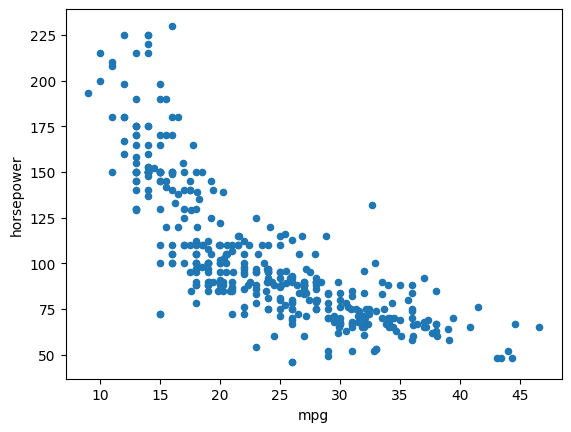

In [102]:
df.plot(kind='scatter', x='mpg', y='horsepower')

In [103]:
# Calcular la correlación entre 'mpg' y 'horsepower'
df[['mpg', 'horsepower']].corr()

,mpg,horsepower
mpg,1.000000,-0.778427
horsepower,-0.778427,1.000000


### Hipótesis de Trabajo
El rendimiento en millas por galón (mpg) disminuye al aumentar los caballos de fuerza (horsepower)

In [104]:
# Ajustar el modelo de regresión lineal
lm = smf.ols(data=df, formula="mpg ~ horsepower").fit()

In [105]:
# Ver los parámetros del modelo
lm.params

Intercept     39.935861
horsepower    -0.157845
dtype: float64

In [106]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 06 Feb 2026   Prob (F-statistic):           7.03e-81
Time:                        17:10:58   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predicciones

In [107]:
x = pd.DataFrame([60, 65, 70, 75, 80], columns=['horsepower'])
x

,horsepower
0,60
1,65
2,70
3,75
4,80


In [108]:
lm.predict(x)

0    30.465177
1    29.675953
2    28.886730
3    28.097506
4    27.308282
dtype: float64

### Inspección de los resultados

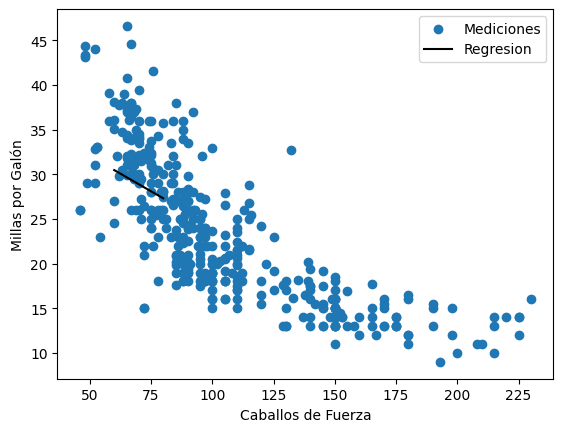

In [109]:
plt.scatter(df['horsepower'], df['mpg'], label='Mediciones')
plt.plot(x, lm.predict(x), c='black', label='Regresion')
plt.xlabel('Caballos de Fuerza')
plt.ylabel('Millas por Galón')
plt.legend(loc=0)

### Análisis de residuales

In [110]:
y_pred = lm.predict(df['horsepower'])
y_true = df['mpg']

<Axes: ylabel='Density'>

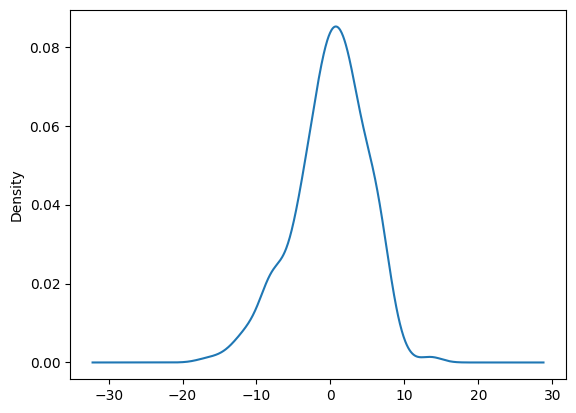

In [111]:
(y_pred - y_true).plot(kind='kde')

### Métricas de evaluación del modelo

In [112]:
metrics.meanabs(y_true,y_pred)

np.float64(3.8275871459582222)

In [113]:
metrics.mse(y_true,y_pred)

np.float64(23.943662938603108)

In [114]:
metrics.rmse(y_true,y_pred)

np.float64(4.893226230065713)

In [115]:
# r2
lm.rsquared

np.float64(0.6059482578894348)

## Weight

<Axes: xlabel='mpg', ylabel='weight'>

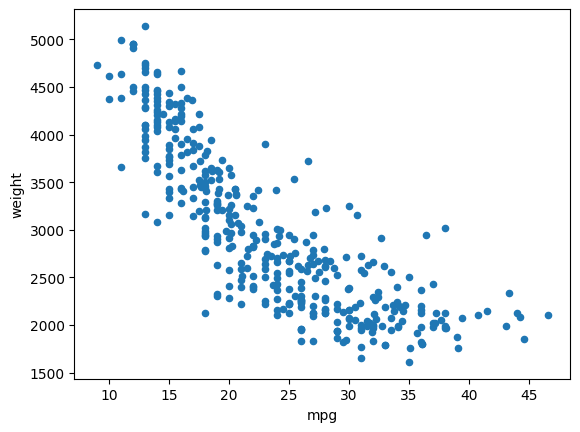

In [116]:
df.plot(kind='scatter', x='mpg', y='weight')

In [117]:
# Calcular la correlación entre 'mpg' y 'weight'
df[['mpg', 'weight']].corr()

,mpg,weight
mpg,1.000000,-0.832244
weight,-0.832244,1.000000


### Hipótesis de trabajo
A mayor peso del vehículo, menor será su eficiencia en millas por galón (mpg).

In [118]:
# Ajustar el modelo de regresión lineal
lm = smf.ols(data=df, formula="mpg ~ weight").fit()

In [119]:
# Ver los parámetros del modelo
lm.params

Intercept    46.216525
weight       -0.007647
dtype: float64

In [120]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Fri, 06 Feb 2026   Prob (F-statistic):          6.02e-102
Time:                        17:10:59   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Fri, 06 Feb 2026   Prob (F-statistic):          6.02e-102
Time:                        17:10:59   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Predicciones

In [122]:
x = pd.DataFrame([60, 65, 70, 75, 80], columns=['weight'])
x

,weight
0,60
1,65
2,70
3,75
4,80


In [123]:
lm.predict(x)

0    45.757684
1    45.719447
2    45.681211
3    45.642974
4    45.604737
dtype: float64

### Inspección de los resultados

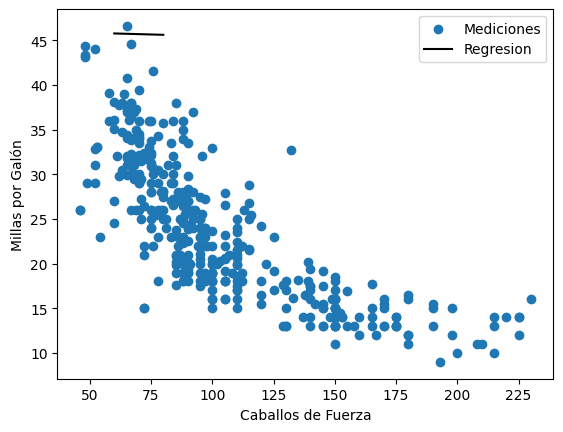

In [124]:
plt.scatter(df['horsepower'], df['mpg'], label='Mediciones')
plt.plot(x, lm.predict(x), c='black', label='Regresion')
plt.xlabel('Caballos de Fuerza')
plt.ylabel('Millas por Galón')
plt.legend(loc=0)

### Análisis de residuales

In [125]:
y_pred = lm.predict(df['weight'])
y_true = df['mpg']

<Axes: ylabel='Density'>

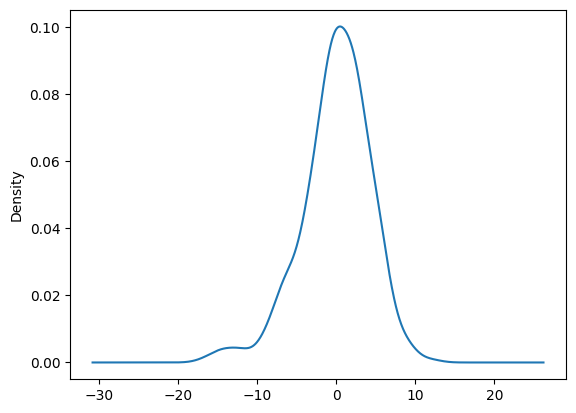

In [126]:
(y_pred - y_true).plot(kind='kde')

### Métricas de evaluación del modelo

In [127]:
# Mean Absolute Error
metrics.meanabs(y_true,y_pred)

np.float64(3.278702411511849)

In [128]:
# Mean Squared Error
metrics.mse(y_true,y_pred)

np.float64(18.6766165974193)

In [129]:
# Root Medium Squared Error
metrics.rmse(y_true,y_pred)

np.float64(4.321645126270701)

In [130]:
# r2
lm.rsquared

np.float64(0.6926304331206254)

## Acceleration

<Axes: xlabel='mpg', ylabel='acceleration'>

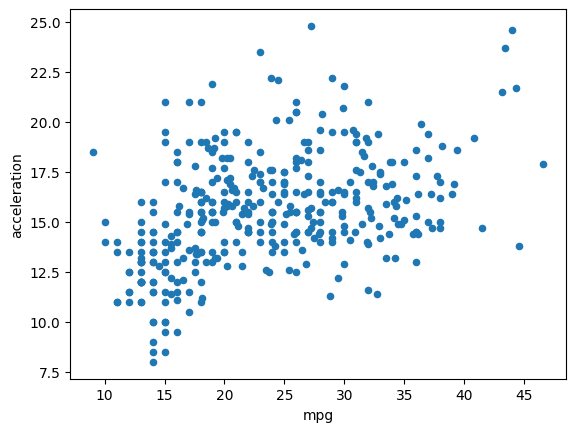

In [131]:
df.plot(kind='scatter', x='mpg', y='acceleration')

In [132]:
# Calcular la correlación entre 'mpg' y 'acceleration'
df[['mpg', 'acceleration']].corr()

,mpg,acceleration
mpg,1.000000,0.423329
acceleration,0.423329,1.000000


### Hipótesis de trabajo


In [133]:
# Ajustar el modelo de regresión lineal
lm = smf.ols(data=df, formula="mpg ~ acceleration").fit()

In [134]:
# Ver los parámetros del modelo
lm.params

Intercept       4.833250
acceleration    1.197624
dtype: float64

In [135]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     85.15
Date:                Fri, 06 Feb 2026   Prob (F-statistic):           1.78e-18
Time:                        17:11:00   Log-Likelihood:                -1322.5
No. Observations:                 392   AIC:                             2649.
Df Residuals:                     390   BIC:                             2657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8332      2.048      2.359      0.019       0.806       8.861
acceleration     1.1976      0.130      9.228      0.000       0.942       1.453
==============================================================================
Omnibus:                       16.649   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.415
Skew:                           0.492   Prob(JB):                     0.000165
Kurtosis:                       2.684   Cond. No.                         90.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predicciones

In [136]:
x = pd.DataFrame([60, 65, 70, 75, 80], columns=['acceleration'])
x

,acceleration
0,60
1,65
2,70
3,75
4,80


In [137]:
lm.predict(x)

0     76.690701
1     82.678822
2     88.666943
3     94.655064
4    100.643185
dtype: float64

### Inspección de los resultados

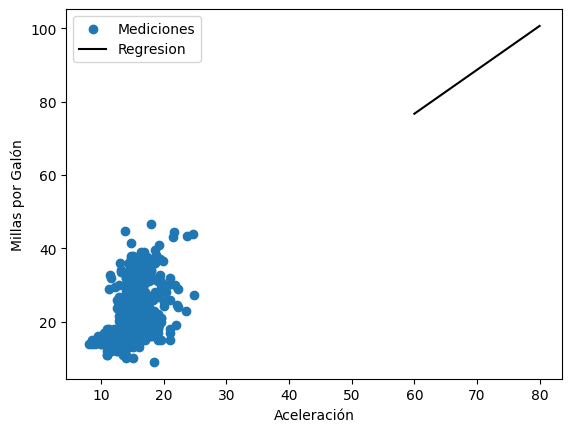

In [138]:
plt.scatter(df['acceleration'], df['mpg'], label='Mediciones')
plt.plot(x, lm.predict(x), c='black', label='Regresion')
plt.xlabel('Aceleración')
plt.ylabel('Millas por Galón')
plt.legend(loc=0)

### Análisis de residuales

In [139]:
y_pred = lm.predict(df['acceleration'])
y_true = df['mpg']

<Axes: ylabel='Density'>

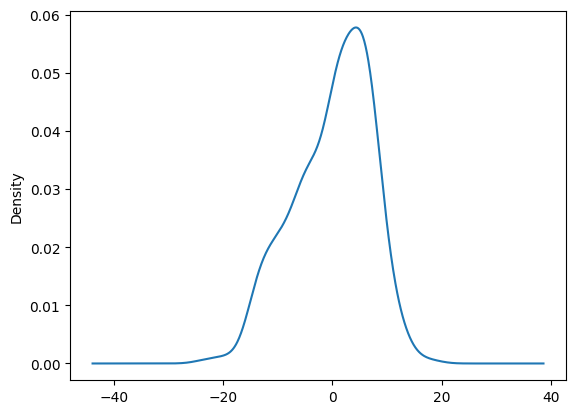

In [140]:
(y_pred - y_true).plot(kind='kde')

### Métricas de evaluación del modelo

In [141]:
# Mean Absolute Error
metrics.meanabs(y_true,y_pred)

np.float64(5.795118114287833)

In [142]:
# Mean Squared Error
metrics.mse(y_true,y_pred)

np.float64(49.87362732665225)

In [143]:
# Root Medium Squared Error
metrics.rmse(y_true,y_pred)

np.float64(7.062126261024526)

In [144]:
# r2
lm.rsquared

np.float64(0.1792070501562546)

# Regresión lienal multiple

Elabore un modelo multivariado utilizando todas las variables  disponibles para explicar el consumo en millas por galón
- Cree un notebook ordenado, documentado y reproducible con su análisis
- Haga un breve análisis exploratorio de los datos ¿es un problema lineal??
- Elabore un modelo regresivo multivariado
- Realice el procedimiento de selección de variables del modelo
- Calcular las métricas de error para cada modelo
- Calcular el coeficiente de determinación
- Hacer análisis de residuales
- ¿Cual es el factor que mayor incidencia tienen en el rendimiento? ¿Por qué?
- ¿Es un mejor modelo que el simple? ¿Cómo se evidencia aquello?

## Análisis de correlación

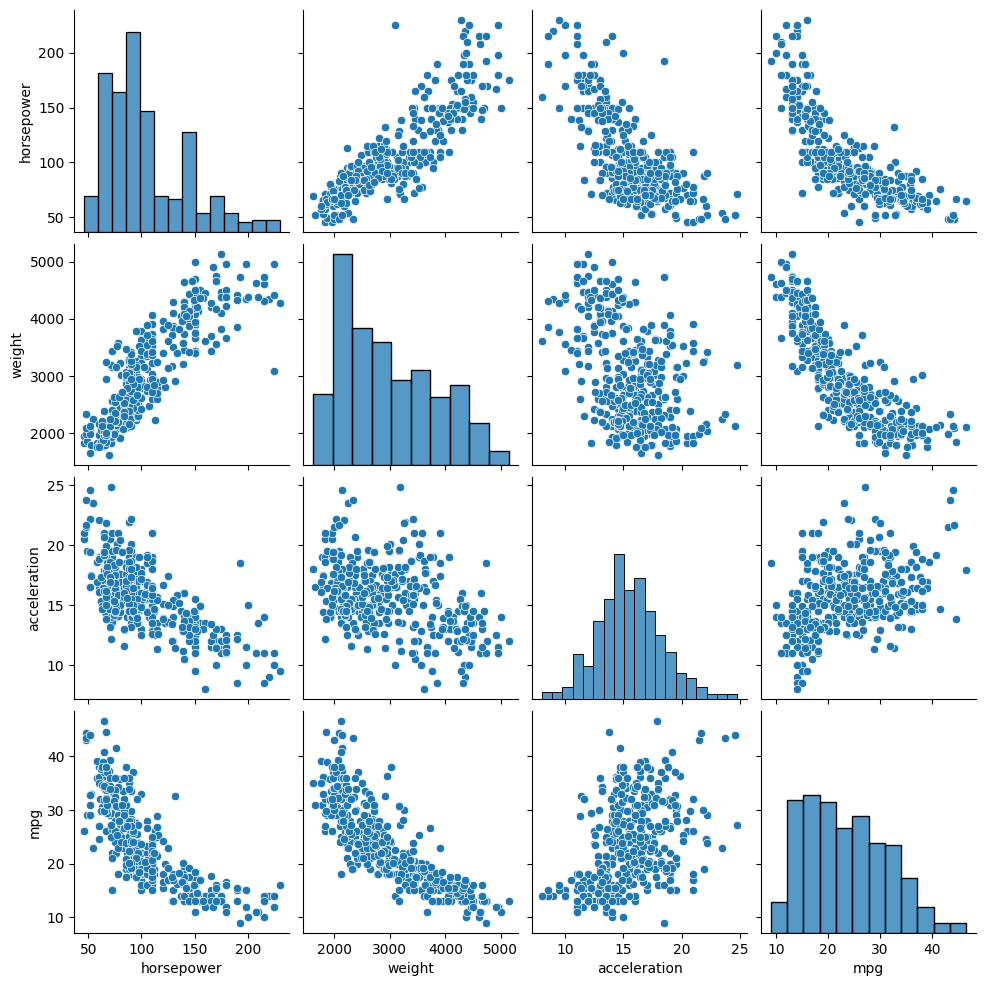

In [147]:
sns.pairplot(df)

In [149]:
corr = df.select_dtypes(include="number").corr()
corr

,horsepower,weight,acceleration,mpg
horsepower,1.000000,0.864538,-0.689196,-0.778427
weight,0.864538,1.000000,-0.416839,-0.832244
acceleration,-0.689196,-0.416839,1.000000,0.423329
mpg,-0.778427,-0.832244,0.423329,1.000000


<Axes: >

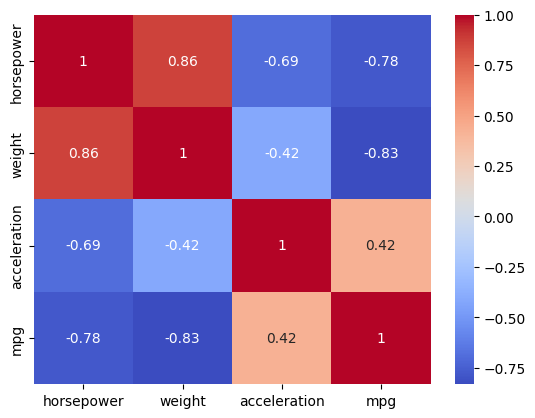

In [151]:
sns.heatmap(corr, cmap="coolwarm", annot=True)

### Formulación del modelo

#### Modelo con una sola variable

In [152]:
lm = smf.ols(formula='Q("mpg") ~ Q("weight")', data=df).fit() 

In [153]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Q("mpg")   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Fri, 06 Feb 2026   Prob (F-statistic):          6.02e-102
Time:                        17:45:05   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.2165      0.799     57.867      0.000      44.646      47.787
Q("weight")    -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
y_true = df['mpg']
y_pred = lm.predict(df['weight'])
print( 'MAE: {}'.format(metrics.meanabs(y_true,y_pred)) )
print( 'MSE: {}'.format(metrics.mse(y_true,y_pred)) )
print( 'RMSE: {}'.format(metrics.rmse(y_true,y_pred)) )
print( 'R2: {}'.format(lm.rsquared))
print( 'R2-Adj: {}'.format(lm.rsquared_adj))

MAE: 3.278702411511849
MSE: 18.6766165974193
RMSE: 4.321645126270701
R2: 0.6926304331206254
R2-Adj: 0.691842306026063


#### Modelo con todas las variables

In [155]:
lm = smf.ols(formula='''Q("mpg")
                            ~ Q("horsepower") +
                              Q("weight") +
                              Q("acceleration")''',data=df).fit() 

In [156]:
lm.params

Intercept            45.678293
Q("horsepower")      -0.047496
Q("weight")          -0.005789
Q("acceleration")    -0.002066
dtype: float64

In [157]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Q("mpg")   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     311.1
Date:                Fri, 06 Feb 2026   Prob (F-statistic):          7.48e-103
Time:                        17:55:55   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     388   BIC:                             2266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            45.6783      2.409     18.965      0.000      40.943      50.414
Q("horsepower")      -0.0475      0.016     -2.970      0.003      -0.079      -0.016
Q("weight")          -0.0058      0.001    -10.024      0.000      -0.007      -0.005
Q("acceleration")    -0.0021      0.123     -0.017      0.987      -0.245       0.240
==============================================================================
Omnibus:                       35.392   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.071
Skew:                           0.684   Prob(JB):                     9.91e-11
Kurtosis:                       3.975   Cond. No.                     3.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
y_true = df['mpg']
y_pred = lm.predict(df[['horsepower', 'weight','acceleration']])
print( 'MAE: {}'.format(metrics.meanabs(y_true,y_pred)) )
print( 'MSE: {}'.format(metrics.mse(y_true,y_pred)) )
print( 'RMSE: {}'.format(metrics.rmse(y_true,y_pred)) )
print( 'R2: {}'.format(lm.rsquared))
print( 'R2-Adj: {}'.format(lm.rsquared_adj))

MAE: 3.235720179777742
MSE: 17.84142954454403
RMSE: 4.223911640238706
R2: 0.7063754859981903
R2-Adj: 0.7041051933641558


Text(0, 0.5, 'Predicción Y')

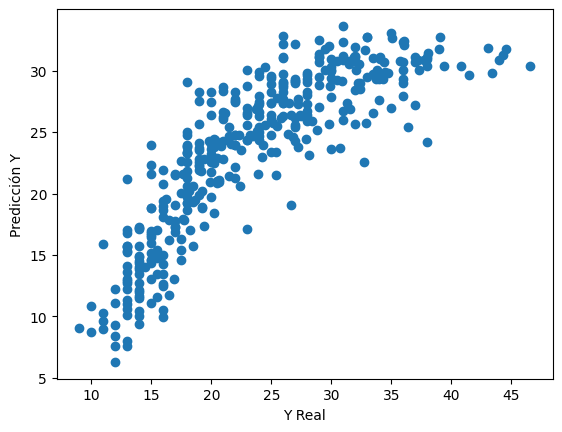

In [159]:
plt.scatter(y_true,y_pred)
plt.xlabel('Y Real')
plt.ylabel('Predicción Y')

C:\Users\ccarr\AppData\Local\Temp\ipykernel_6408\619079592.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_true-y_pred)


<Axes: ylabel='Density'>

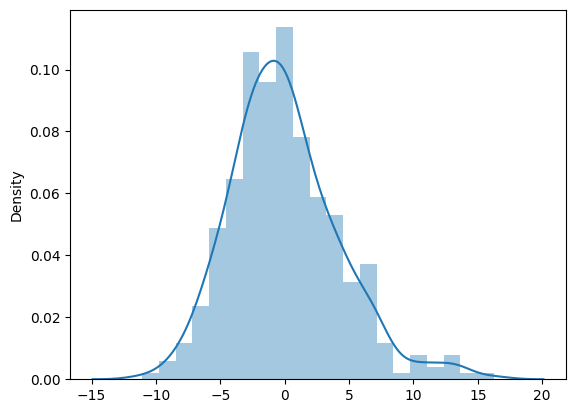

In [160]:
sns.distplot(y_true-y_pred)

### Conclusiones

### Selección del modelo